In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
df_train.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [5]:
df_train.drop("Id",axis=1,inplace=True)

In [6]:
 df_train["Attrition"]

0       0
1       0
2       1
3       0
4       0
5       0
6       1
7       0
8       0
9       1
10      0
11      0
12      0
13      0
14      1
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1598    1
1599    1
1600    1
1601    1
1602    1
1603    1
1604    1
1605    1
1606    1
1607    1
1608    1
1609    1
1610    1
1611    1
1612    1
1613    1
1614    1
1615    1
1616    1
1617    1
1618    1
1619    1
1620    1
1621    1
1622    1
1623    1
1624    1
1625    1
1626    1
1627    1
Name: Attrition, Length: 1628, dtype: int64

# WE have our target variable as binary 
# We will be applying classification algortihms here


In [7]:
corr_mat=df_train.corr()

In [8]:
df_train.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [9]:
total_columns=df_train.columns

In [10]:
type(total_columns)

pandas.core.indexes.base.Index

In [11]:
total_columns=list(total_columns)

In [12]:
#checking the count of categorical variables
categrorical_columns=[]
for i in total_columns:
    if(df_train[i].dtypes=='object'):
        categrorical_columns.append(i)
    

In [13]:
#we got the categorical columns
categrorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
#another way to look for categorical data
another_categorical_columns=list(df_train.select_dtypes(include='object').columns)

In [15]:
another_categorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [16]:
df_train.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [17]:
#no missing values in our data set so need to impute them


# Grouping and Data Visualization

In [18]:
#checking the unique values of each categorical column
for i in categrorical_columns:
    print("NUmber of unique values in {} are {}".format(i,df_train[i].nunique()))

NUmber of unique values in BusinessTravel are 3
NUmber of unique values in Department are 3
NUmber of unique values in EducationField are 6
NUmber of unique values in Gender are 2
NUmber of unique values in JobRole are 9
NUmber of unique values in MaritalStatus are 3
NUmber of unique values in OverTime are 2


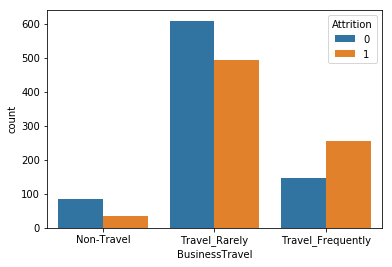

In [19]:
sns.countplot(x='BusinessTravel',data=df_train,hue='Attrition')

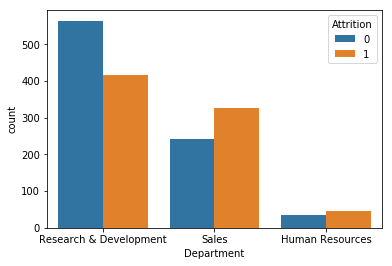

In [20]:
sns.countplot(x='Department',data=df_train,hue='Attrition')

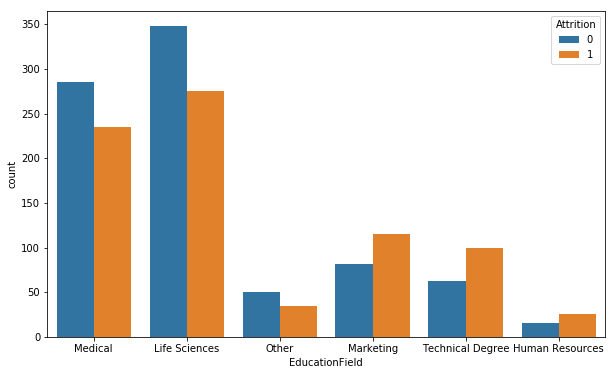

In [21]:

fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='EducationField',data=df_train,hue='Attrition',ax=ax)

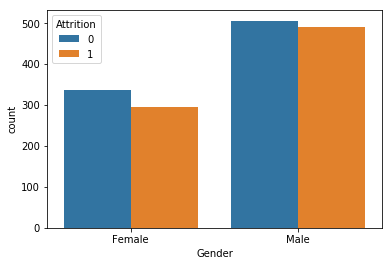

In [22]:
sns.countplot(x='Gender',data=df_train,hue='Attrition')

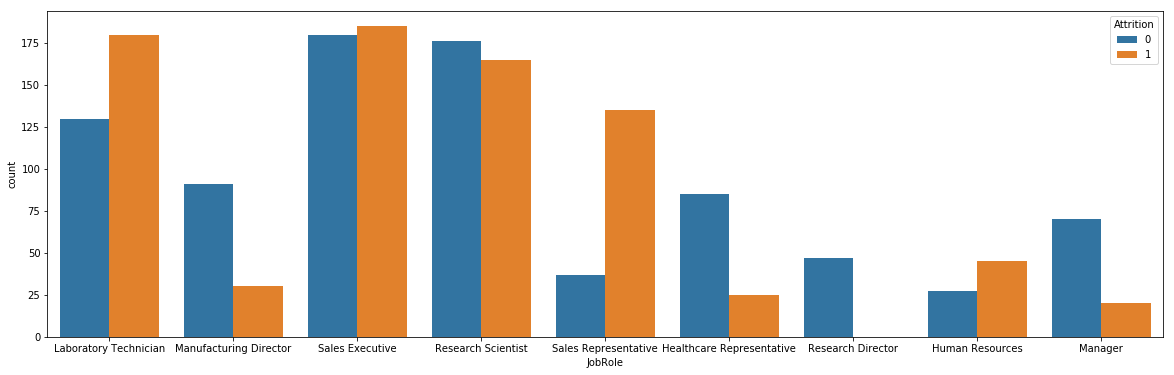

In [23]:

fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='JobRole',data=df_train,hue='Attrition',ax=ax)

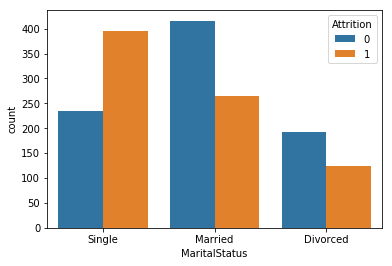

In [24]:
sns.countplot(x='MaritalStatus',data=df_train,hue='Attrition')

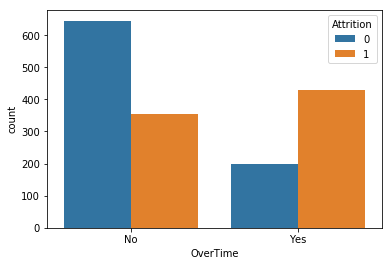

In [25]:
sns.countplot(x='OverTime',data=df_train,hue='Attrition')


# printing corr_matrix

In [26]:
#getting numerical columns
numerical_columns=df_train.select_dtypes(exclude='object').columns

In [27]:
df_train[["Attrition","DistanceFromHome"]].corr().iloc[:,0]

Attrition           1.000000
DistanceFromHome    0.109224
Name: Attrition, dtype: float64

In [28]:
numerical_columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [29]:
numerical_col_list=list(numerical_columns)

In [30]:
numerical_col_list[0]="Attrition"

In [31]:
numerical_col_list[1]='Age'

In [32]:
#printing the correlation 

In [33]:
df_train[numerical_col_list].corr().iloc[:,0].sort_values(ascending=False)

Attrition                  1.000000
DistanceFromHome           0.109224
CommunicationSkill         0.103379
NumCompaniesWorked         0.034763
PerformanceRating          0.010202
PercentSalaryHike         -0.012668
Education                 -0.041390
YearsSinceLastPromotion   -0.050379
EmployeeNumber            -0.051512
TrainingTimesLastYear     -0.105663
EnvironmentSatisfaction   -0.111746
JobSatisfaction           -0.148012
JobInvolvement            -0.159710
StockOptionLevel          -0.175496
Age                       -0.200596
YearsWithCurrManager      -0.222752
YearsAtCompany            -0.230061
MonthlyIncome             -0.240479
TotalWorkingYears         -0.262922
YearsInCurrentRole        -0.269408
Behaviour                       NaN
Name: Attrition, dtype: float64

# Encoding the categorical Columns

In [34]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [35]:
for i in categrorical_columns:
    df_train[i]=lb.fit_transform(df_train[i])

In [36]:
df_train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,0,1,2,3,3,571,3,0,...,3,0,12,2,11,7,6,7,4,1
1,36,0,2,1,12,4,1,1614,3,0,...,3,2,7,2,3,2,1,1,2,1
2,55,1,2,2,2,1,3,842,3,1,...,3,0,12,3,9,7,7,3,5,1
3,39,0,2,1,24,1,1,2014,1,1,...,3,0,18,2,7,7,1,7,4,1
4,37,0,2,1,3,3,4,689,3,1,...,3,1,10,2,10,7,7,8,1,1
5,31,0,2,2,7,4,1,941,2,1,...,3,0,13,2,7,7,5,2,2,1
6,32,1,2,1,1,3,1,331,4,1,...,3,0,4,2,3,2,1,2,1,1
7,33,0,2,1,4,4,3,1502,1,0,...,3,0,8,5,5,4,0,2,5,1
8,35,0,1,2,11,2,2,1137,4,1,...,3,1,5,3,5,2,0,2,4,1
9,21,1,2,2,7,1,2,1780,2,1,...,3,0,1,3,1,0,1,0,5,1


In [37]:
df_train.dtypes

Age                        int64
Attrition                  int64
BusinessTravel             int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EmployeeNumber             int64
EnvironmentSatisfaction    int64
Gender                     int64
JobInvolvement             int64
JobRole                    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
OverTime                   int64
PercentSalaryHike          int64
PerformanceRating          int64
StockOptionLevel           int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
CommunicationSkill         int64
Behaviour                  int64
dtype: object

In [38]:
#now checking the correlation with target variable
new_numerical_col=df_train.columns


In [39]:
new_numerical_col=list(new_numerical_col)

In [40]:
new_numerical_col[0]="Attrition"
new_numerical_col[1]="Age"

In [41]:
df_train[new_numerical_col].corr().iloc[:,0].sort_values(ascending=False)

Attrition                  1.000000
OverTime                   0.321194
MaritalStatus              0.198327
JobRole                    0.125322
DistanceFromHome           0.109224
CommunicationSkill         0.103379
Department                 0.099875
EducationField             0.046867
NumCompaniesWorked         0.034763
Gender                     0.024573
PerformanceRating          0.010202
PercentSalaryHike         -0.012668
BusinessTravel            -0.029573
Education                 -0.041390
YearsSinceLastPromotion   -0.050379
EmployeeNumber            -0.051512
TrainingTimesLastYear     -0.105663
EnvironmentSatisfaction   -0.111746
JobSatisfaction           -0.148012
JobInvolvement            -0.159710
StockOptionLevel          -0.175496
Age                       -0.200596
YearsWithCurrManager      -0.222752
YearsAtCompany            -0.230061
MonthlyIncome             -0.240479
TotalWorkingYears         -0.262922
YearsInCurrentRole        -0.269408
Behaviour                   

# Employee Number is of no use thus removing it


In [42]:
df_train.drop("EmployeeNumber",axis=1,inplace=True)

In [43]:
X=df_train.drop("Attrition",1)
y=df_train["Attrition"]

# Spilitting the dataset

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

# Applying  Algorithms Without Removing less correlated Features

#    Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0,max_depth=10)

In [46]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

No handles with labels found to put in legend.


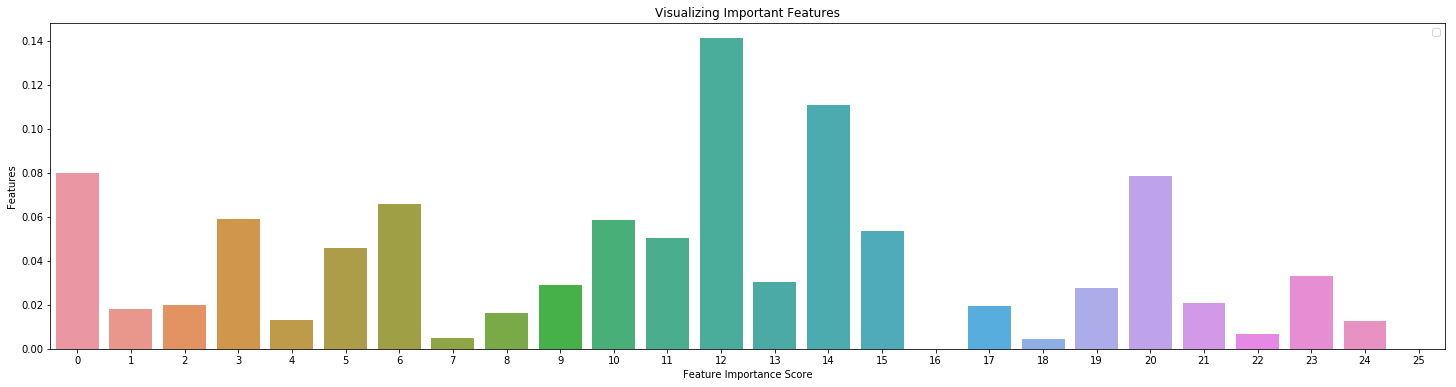

In [47]:

fig_dims = (25,6)
fig, ax = plt.subplots(figsize=fig_dims)
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(y=feature_imp, x=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [50]:
feature_imp


12    0.141189
14    0.110906
0     0.080020
20    0.078614
6     0.065647
3     0.058774
10    0.058568
15    0.053703
11    0.050455
5     0.045922
23    0.032888
13    0.030260
9     0.029153
19    0.027707
21    0.020764
2     0.019977
17    0.019559
1     0.018067
8     0.016053
4     0.012933
24    0.012556
22    0.006785
7     0.004959
18    0.004541
16    0.000000
25    0.000000
dtype: float64

# checking the accuray


In [56]:
y_pred_train=clf.predict(X_train)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy of the training set is {}".format(accuracy_score(y_train,y_pred_train)))

Accuracy of the training set is 0.9736611062335382


In [58]:
y_pred_test=clf.predict(X_test)

In [59]:
print("Accuracy of the training set is {}".format(accuracy_score(y_test,y_pred_test)))

Accuracy of the training set is 0.9897750511247444


In [60]:
df_test=pd.read_csv("test.csv")


In [61]:
df_test.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [62]:
df_test.shape

(470, 28)

In [63]:
#chekcing the categorical columns in the test file
categorical_columns_test=df_test.select_dtypes(include='object').columns

In [64]:
df_test.drop(["Id","EmployeeNumber"],axis=1,inplace=True)


In [65]:
categorical_columns_test


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [66]:
categrorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [67]:
for i in categorical_columns_test:
    df_test[i]=lb.fit_transform(df_test[i])

In [68]:
df_test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,28,2,1,9,3,3,4,1,3,6,...,4,1,5,3,5,2,0,4,5,1
1,31,2,2,6,4,3,1,1,4,7,...,4,2,13,4,7,7,5,7,3,1
2,37,2,1,6,3,3,3,1,4,6,...,3,2,13,2,7,7,6,7,4,1
3,42,2,1,1,2,1,4,0,2,4,...,3,1,8,4,4,3,0,2,5,1
4,45,0,1,4,2,1,3,1,3,2,...,3,0,9,5,9,7,0,8,2,1


In [69]:
df_test.columns



Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [70]:
df_train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [71]:
y_pred_validate=clf.predict(df_test)

In [72]:
clf.classes_

array([0, 1])

In [73]:
y_pred_prob=clf.predict_proba(df_test)

In [74]:
# accesing prob for class 0
y_pred_prob_class_1=list(y_pred_prob[:,1])

In [75]:
y_pred_prob_class_1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7638888888888888,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8108108108108109,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9722222222222222,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8108108108108109,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9722222222222222,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.7638888888888888,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9722222222222222,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.9523809523809523,
 0.0,
 0.0,
 

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Poitive Class ,auc"+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
xg_clf=GradientBoostingClassifier(n_estimators=80,learning_rate=0.1,max_depth=8)

In [ ]:
xg_clf.fit(X_train,y_train)

In [ ]:
y_pred_prob_xg_clf=xg_clf.predict_proba(df_test)

In [ ]:
xg_clf.classes_

In [ ]:
print(accuracy_score(y_test,xg_clf.predict(X_test)))

In [85]:
dummy=pd.read_csv("test.csv")

In [ ]:
y_pred_prob_xg_clf_class_0=list(y_pred_prob_xg_clf[:,1])

In [ ]:
sample_df=pd.DataFrame({"Id":dummy["Id"],"Attriotion":y_pred_prob_xg_clf_class_0})

In [ ]:
y_pred_xgb=clf.predict(X_test)

In [ ]:
sample_df.to_csv('sample_sub.csv',index=False)

In [ ]:
y_pred_prob_xg_clf_=y_pred_prob_xg_clf>0.5

In [ ]:
y_pred_prob_xg_clf

In [ ]:
pd.

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
forest_clf=RandomForestClassifier(n_estimators=150,max_depth=10,random_state=0)

In [81]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
print("Accuracy of the training set is {}".format(accuracy_score(y_test,forest_clf.predict(X_test))))

Accuracy of the training set is 0.9529652351738241


In [91]:
forest_pred_prob=list(forest_clf.predict_proba(df_test)[:,1])

In [84]:
print("Accuracy of the training set is {}".format(accuracy_score(y_train,forest_clf.predict(X_train))))

Accuracy of the training set is 1.0


In [93]:
forest_sample_csv=pd.DataFrame({"Id":dummy["Id"],"Attrition":forest_pred_prob})

In [92]:
forest_pred_prob

[0.1340970491810415,
 0.11076502505188993,
 0.16108905757507108,
 0.26019291186151905,
 0.11544209834313084,
 0.17194978270690017,
 0.7389287940517532,
 0.2065127168895285,
 0.25422178440972193,
 0.11623823479022405,
 0.14777964708608196,
 0.3076790137391362,
 0.159624068201093,
 0.05933110840526257,
 0.13660466120147313,
 0.241160676954581,
 0.37487106818313914,
 0.2877900015594316,
 0.2048747991885247,
 0.022350817006527107,
 0.10448711016600433,
 0.622559705016679,
 0.22091028111923194,
 0.10569287155111462,
 0.2081663974946053,
 0.025743379427604702,
 0.04931774549433869,
 0.11783911286995563,
 0.8402452915292671,
 0.0666496312152236,
 0.07954190682924117,
 0.1714720399002441,
 0.5070183990140634,
 0.3955013766451467,
 0.062374004184974546,
 0.14552077001013172,
 0.1565611930581512,
 0.14386702049240746,
 0.26881418367735793,
 0.22114185817696252,
 0.6977203672136536,
 0.2791559844688677,
 0.11486390515802279,
 0.08379455930662619,
 0.14460397680911818,
 0.2130372421521674,
 0.3195

In [94]:
forest_sample_csv.to_csv("forest_sample_csv",index=False)

In [95]:
a=10 
b=10
print(id(a)==id(b))

True


In [102]:
p = re.findall(‘hello’)

SyntaxError: invalid character in identifier (<ipython-input-102-f991d57799a6>, line 1)

In [103]:
li=['h''e''l''l''l''0']

In [105]:
print(len(li))

1


In [106]:
d={}

In [119]:
m = re.search('a', 'The blue umbrella')
m.re.pattern

'a'

In [121]:
st = "Hello World"
print(st[0:5])

Hello
